In [84]:
import numpy as np
import urllib.parse
import random
import requests


domain = "51.91.251.0"
port = 3000
host = f"http://{domain}:{port}"
path = lambda x: urllib.parse.urljoin(host, x)

user_id = '07c8d172-5838-4ff7-a8c3-a107546de381'



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as sclust
from scipy import cluster
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import numpy as np
import random
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

In [85]:
avatars = []
dates = np.arange(45)
cities = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna', 'vilnius']
languages = ['austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech', 'danish', 'dutch',
             'estonian', 'finnish', 'french', 'german', 'greek', 'hungarian', 'irish', 'italian',
             'latvian', 'lithuanian', 'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian',
             'slovakian', 'slovene', 'spanish', 'swedish']
mobile = [0,1]



In [83]:
d_percentage['amsterdam']

17

In [87]:
c=1
list_requests = []
for i in range(17):
        name = 'yaa-'+str(c)+'-avatar'
        r = requests.post(path(f'avatars/{user_id}/{name}'))
        params = {
            "avatar_name": name,
            "language": random.choice(languages),
            "city": 'amsterdam',
            "date": random.choice(dates),
            "mobile": random.choice(mobile)
            }
        list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
        c+=1

In [112]:
d4=d_percentage.pop('amsterdam', None)
print(d_percentage)

{'paris': 17, 'madrid': 16, 'copenhagen': 11, 'rome': 11, 'vilnius': 9, 'vienna': 9, 'sofia': 6, 'valletta': 4}


In [119]:
d_percentage.keys()

dict_keys(['paris', 'madrid', 'copenhagen', 'rome', 'vilnius', 'vienna', 'sofia', 'valletta'])

In [121]:

c=18
list_requests=[]
for city in d_percentage.keys():
    for i in range(d_percentage[city]):
        name = 'yaa-'+str(c)+'-avatar'
        r = requests.post(path(f'avatars/{user_id}/{name}'))
        params = {
            "avatar_name": name,
            "language": random.choice(languages),
            "city": city,
            "date": random.choice(dates),
            "mobile": random.choice(mobile)
            }
        list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
        c+=1



In [126]:
len(list_requests)

83

In [116]:
list_requests_amsterdam1= list_requests.copy()
list_requests_amsterdam1

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [128]:
pricing_requests = []

for r in list_requests:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,868,175,30,paris,19,hungarian,0,33428
1,948,189,34,paris,19,hungarian,0,33428
2,21,84,9,paris,19,hungarian,0,33428
3,299,113,0,paris,19,hungarian,0,33428
4,62,84,7,paris,19,hungarian,0,33428
...,...,...,...,...,...,...,...,...
39,363,165,6,valletta,6,cypriot,1,33510
40,639,207,4,valletta,6,cypriot,1,33510
41,424,280,4,valletta,6,cypriot,1,33510
42,504,193,8,valletta,6,cypriot,1,33510


In [127]:
pricing_requests

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,366,78,24,amsterdam,24,estonian,1,33411
1,317,173,44,amsterdam,24,estonian,1,33411
2,685,264,58,amsterdam,24,estonian,1,33411
3,83,156,28,amsterdam,24,estonian,1,33411
4,441,180,41,amsterdam,24,estonian,1,33411
...,...,...,...,...,...,...,...,...
119,352,101,38,amsterdam,17,croatian,0,33427
120,283,107,14,amsterdam,17,croatian,0,33427
121,627,107,0,amsterdam,17,croatian,0,33427
122,230,125,11,amsterdam,17,croatian,0,33427


In [123]:
pricing_requests_amsterdam1= pricing_requests.copy()
pricing_requests_amsterdam1

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,366,78,24,amsterdam,24,estonian,1,33411
1,317,173,44,amsterdam,24,estonian,1,33411
2,685,264,58,amsterdam,24,estonian,1,33411
3,83,156,28,amsterdam,24,estonian,1,33411
4,441,180,41,amsterdam,24,estonian,1,33411
...,...,...,...,...,...,...,...,...
119,352,101,38,amsterdam,17,croatian,0,33427
120,283,107,14,amsterdam,17,croatian,0,33427
121,627,107,0,amsterdam,17,croatian,0,33427
122,230,125,11,amsterdam,17,croatian,0,33427


In [132]:

df3 = pd.concat([pricing_requests_amsterdam1,pricing_requests])


,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,366,78,24,amsterdam,24,estonian,1,33411
1,317,173,44,amsterdam,24,estonian,1,33411
2,685,264,58,amsterdam,24,estonian,1,33411
3,83,156,28,amsterdam,24,estonian,1,33411
4,441,180,41,amsterdam,24,estonian,1,33411
...,...,...,...,...,...,...,...,...
39,363,165,6,valletta,6,cypriot,1,33510
40,639,207,4,valletta,6,cypriot,1,33510
41,424,280,4,valletta,6,cypriot,1,33510
42,504,193,8,valletta,6,cypriot,1,33510


In [134]:
pricing_requests=df3
pricing_requests
pricing_requests.to_csv('pricing_requests_100req.csv')

In [113]:
pricing_requests['avatar_id'].unique()

array([33411, 33412, 33413, 33414, 33415, 33416, 33417, 33418, 33419,
       33420, 33421, 33422, 33423, 33424, 33425, 33426, 33427],
      dtype=int64)

In [103]:
pricing_requests
pricing_requests[pricing_requests['avatar_id']==33411]

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,366,78,24,amsterdam,24,estonian,1,33411
1,317,173,44,amsterdam,24,estonian,1,33411
2,685,264,58,amsterdam,24,estonian,1,33411
3,83,156,28,amsterdam,24,estonian,1,33411
4,441,180,41,amsterdam,24,estonian,1,33411
...,...,...,...,...,...,...,...,...
128,680,150,14,amsterdam,24,estonian,1,33411
129,743,165,32,amsterdam,24,estonian,1,33411
130,303,187,42,amsterdam,24,estonian,1,33411
131,111,117,22,amsterdam,24,estonian,1,33411


In [92]:
pricing_requests.to_csv("pricing_requests_for_amsterdam.csv")

In [17]:
list_requests[0].json()

{'prices': [{'hotel_id': 80, 'price': 165, 'stock': 280},
  {'hotel_id': 61, 'price': 163, 'stock': 281},
  {'hotel_id': 47, 'price': 117, 'stock': 195},
  {'hotel_id': 74, 'price': 101, 'stock': 138},
  {'hotel_id': 420, 'price': 51, 'stock': 111},
  {'hotel_id': 956, 'price': 72, 'stock': 110},
  {'hotel_id': 607, 'price': 100, 'stock': 138},
  {'hotel_id': 678, 'price': 74, 'stock': 112},
  {'hotel_id': 479, 'price': 117, 'stock': 197},
  {'hotel_id': 687, 'price': 100, 'stock': 141},
  {'hotel_id': 89, 'price': 74, 'stock': 112},
  {'hotel_id': 204, 'price': 52, 'stock': 56},
  {'hotel_id': 545, 'price': 102, 'stock': 140},
  {'hotel_id': 820, 'price': 120, 'stock': 195},
  {'hotel_id': 18, 'price': 51, 'stock': 57},
  {'hotel_id': 247, 'price': 120, 'stock': 194},
  {'hotel_id': 240, 'price': 120, 'stock': 193},
  {'hotel_id': 155, 'price': 74, 'stock': 111},
  {'hotel_id': 503, 'price': 165, 'stock': 279},
  {'hotel_id': 432, 'price': 118, 'stock': 197},
  {'hotel_id': 215, 'pric

In [2]:
# import pandas module 
import pandas as pd 
    
# making dataframe 
df = pd.read_csv("test_set.csv") 
   
# output the dataframe
print(df)

      index  order_requests     city  date  language  mobile  avatar_id  \
0         0               1  vilnius    21  romanian       0          1   
1         1               1  vilnius    21  romanian       0          1   
2         2               1  vilnius    21  romanian       0          1   
3         3               1  vilnius    21  romanian       0          1   
4         4               1  vilnius    21  romanian       0          1   
...     ...             ...      ...   ...       ...     ...        ...   
6639   6639             843     rome     5     irish       0        794   
6640   6640             844   vienna     1     irish       1        794   
6641   6641             844   vienna     1     irish       1        794   
6642   6642             844   vienna     1     irish       1        794   
6643   6643             844   vienna     1     irish       1        794   

      hotel_id  stock  
0          161     46  
1          187     32  
2          279     12  
3  

In [3]:
stats = df['city'].describe()
print(stats)

count          6644
unique            9
top       amsterdam
freq           1134
Name: city, dtype: object


In [41]:
d_city=df['city'].value_counts()
d_city

amsterdam     1134
paris         1125
madrid        1094
copenhagen     723
rome           721
vilnius        609
vienna         568
sofia          374
valletta       296
Name: city, dtype: int64

In [42]:
d_city = d_city.to_frame(name='ville')

In [44]:
d_city['percent'] = (d_city['ville']/
                    d_city['ville'].sum())*100
d_city

,ville,percent
amsterdam,1134,17.068031
paris,1125,16.932571
madrid,1094,16.465984
copenhagen,723,10.881999
rome,721,10.851896
vilnius,609,9.166165
vienna,568,8.549067
sofia,374,5.629139
valletta,296,4.455148


In [79]:
d_percentage=d_city['percent'].round()
d_percentage=d_percentage.to_frame(name='percentage')
d_percentage=d_percentage['percentage'].astype('int')
d_percentage= d_percentage.to_dict()
d_percentage

{'amsterdam': 17,
 'paris': 17,
 'madrid': 16,
 'copenhagen': 11,
 'rome': 11,
 'vilnius': 9,
 'vienna': 9,
 'sofia': 6,
 'valletta': 4}

In [5]:
stats1 = df['language'].describe()
print(stats1)

count          6644
unique           27
top       hungarian
freq            967
Name: language, dtype: object


In [6]:
stats2 = df['hotel_id'].describe()
print(stats2)

count    6644.000000
mean      472.193709
std       280.681105
min         0.000000
25%       252.000000
50%       449.000000
75%       702.000000
max       995.000000
Name: hotel_id, dtype: float64


In [10]:
df['language'].value_counts()

hungarian        967
finnish          466
austrian         461
romanian         439
slovakian        418
swedish          404
estonian         390
bulgarian        356
danish           346
irish            209
maltese          197
greek            181
slovene          174
belgian          153
spanish          141
dutch            134
polish           131
french           128
italian          128
luxembourgish    125
lithuanian       122
latvian          113
cypriot          106
czech            104
croatian         101
german            80
portuguese        70
Name: language, dtype: int64

In [28]:
summary=df.describe()
summary

,index,order_requests,date,mobile,avatar_id,hotel_id,stock
count,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000
mean,3321.500000,419.312763,15.201084,0.453642,381.219597,472.193709,23.766105
std,1918.101926,246.445963,13.783346,0.497884,243.526271,280.681105,32.582240
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1660.750000,202.000000,3.000000,0.000000,171.000000,252.000000,2.000000
50%,3321.500000,415.500000,15.000000,0.000000,381.000000,449.000000,8.000000
75%,4982.250000,636.000000,21.000000,1.000000,589.250000,702.000000,33.000000
max,6643.000000,844.000000,40.000000,1.000000,794.000000,995.000000,199.000000


In [26]:
df2=df.groupby(['city','language']).mean()
df2

index  order_requests       date    mobile  \
city      language                                                      
amsterdam austrian   1745.579832      217.159664  15.789916  0.529412   
          belgian     499.000000       60.000000  17.000000  0.000000   
          bulgarian  3886.333333      492.142857  24.047619  0.000000   
          croatian   5850.500000      745.000000   4.000000  0.000000   
          czech      3309.083333      415.250000  16.500000  0.583333   
...                          ...             ...        ...       ...   
vilnius   romanian   1090.734694      137.448980  22.081633  0.571429   
          slovakian  3055.423077      384.230769  28.269231  0.000000   
          slovene    4187.000000      528.000000   2.000000  0.000000   
          spanish    2412.818182      300.818182  24.500000  0.545455   
          swedish    3699.000000      469.045455  25.022727  0.500000   

                      avatar_id    hotel_id      stock  
city      language                                      
amsterdam austrian   225.873950  387.714286  24.579832  
          belgian     24.000000  378.181818  18.818182  
          bulgarian  440.333333  415.333333  35.047619  
          croatian   319.000000  356.642857   3.214286  
          czech      476.666667  398.125000  25.416667  
...                         ...         ...        ...  
vilnius   romanian   103.897959  562.142857  37.571429  
          slovakian  371.846154  523.769231  68.346154  
          slovene    329.000000  564.666667   0.666667  
          spanish    658.500000  545.136364  47.136364  
          swedish    416.363636  545.136364  53.954545  

[212 rows x 7 columns]

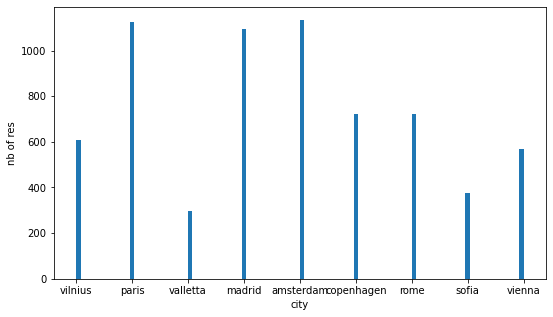

In [38]:
plt.figure(figsize = (30, 5))
plt.subplot(1, 3, 1)
plt.hist(df['city'], bins = 100)
plt.xlabel("city")
plt.ylabel("nb of res")
plt.show()

In [45]:
import seaborn as sns

In [52]:
mycol= ['city', 'date', 'language','mobile']
df2=df[mycol]
df2

,city,date,language,mobile
0,vilnius,21,romanian,0
1,vilnius,21,romanian,0
2,vilnius,21,romanian,0
3,vilnius,21,romanian,0
4,vilnius,21,romanian,0
...,...,...,...,...
6639,rome,5,irish,0
6640,vienna,1,irish,1
6641,vienna,1,irish,1
6642,vienna,1,irish,1


In [56]:
#mat_cov= np.cov(df2)
sns.heatmap(df2.corr())

TypeError: corr() got an unexpected keyword argument 'numeric_only'